In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 74us/step - loss: 0.0014 - val_loss: 2.7440e-04
Epoch 2/150
256326/256326 [==============================] - 18s 72us/step - loss: 1.8450e-04 - val_loss: 1.6005e-04
Epoch 3/150
256326/256326 [==============================] - 18s 71us/step - loss: 1.3433e-04 - val_loss: 1.2829e-04
Epoch 4/150
256326/256326 [==============================] - 18s 71us/step - loss: 1.1843e-04 - val_loss: 1.2905e-04
Epoch 5/150
256326/256326 [==============================] - 18s 71us/step - loss: 1.0179e-04 - val_loss: 9.8993e-05
Epoch 6/150
256326/256326 [==============================] - 18s 71us/step - loss: 9.1421e-05 - val_loss: 9.4995e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 18s 71us/step - loss: 3.4773e-05 - val_loss: 3.4574e-05
Epoch 69/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.4537e-05 - val_loss: 3.3806e-05
Epoch 70/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.4376e-05 - val_loss: 3.4285e-05
Epoch 71/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.3984e-05 - val_loss: 3.6170e-05
Epoch 72/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.3634e-05 - val_loss: 5.3501e-05
Epoch 73/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.3659e-05 - val_loss: 3.5337e-05
Epoch 74/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.3666e-05 - val_loss: 3.2969e-05
Epoch 75/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.3121e-05 - val_loss: 3.7386e-05
Epoch 76/150
256326/256326 [==============================] - 18s 71u

256326/256326 [==============================] - 18s 70us/step - loss: 2.9391e-05 - val_loss: 3.6315e-05
Epoch 138/150
256326/256326 [==============================] - 18s 70us/step - loss: 2.9150e-05 - val_loss: 3.3676e-05
Epoch 139/150
256326/256326 [==============================] - 18s 70us/step - loss: 2.9124e-05 - val_loss: 2.9103e-05
Epoch 140/150
256326/256326 [==============================] - 18s 70us/step - loss: 2.9173e-05 - val_loss: 3.0476e-05
Epoch 141/150
256326/256326 [==============================] - 18s 70us/step - loss: 2.9071e-05 - val_loss: 2.6792e-05
Epoch 142/150
256326/256326 [==============================] - 18s 70us/step - loss: 2.9219e-05 - val_loss: 3.0645e-05
Epoch 143/150
256326/256326 [==============================] - 18s 71us/step - loss: 2.9081e-05 - val_loss: 3.0480e-05
Epoch 144/150
256326/256326 [==============================] - 18s 70us/step - loss: 2.9137e-05 - val_loss: 3.2254e-05
Epoch 145/150
256326/256326 [==============================] -

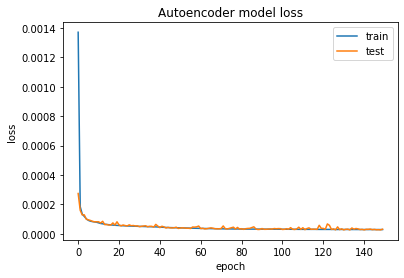

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.0053 - val_accuracy: 0.9989
Epoch 2/50
256326/256326 [==============================] - 44s 172us/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 3/50
256326/256326 [==============================] - 44s 172us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 4/50
256326/256326 [==============================] - 44s 172us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

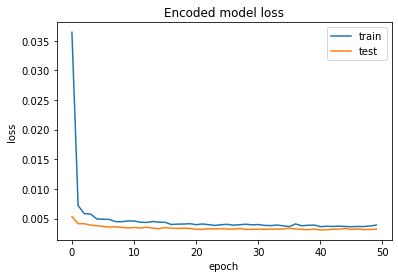

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679997191109


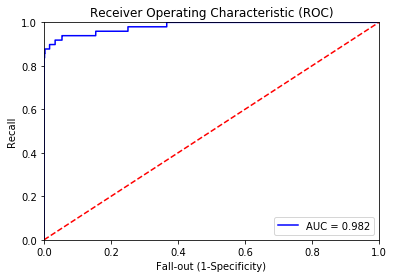

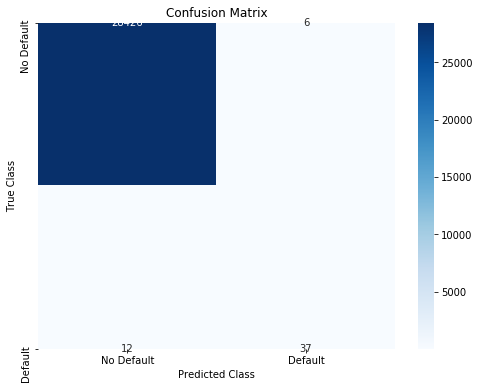

AUC(ROC): 0.8774455054953889
Precision: 0.8604651162790697
Recall: 0.7551020408163265
F1 score: 0.8043478260869564
False positives: 6
True positives: 37
False negatives: 12
True negatives: 28426
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 21s 81us/step - loss: 0.0012 - val_loss: 2.3179e-04
Epoch 2/150
256326/256326 [==============================] - 23s 88us/step - loss: 1.8236e-04 - val_loss: 1.5577e-04
Epoch 3/150
256326/256326 [==============================] - 21s 80us/step - loss: 1.3025e-04 - val_loss: 1.2763e-04
Epoch 4/150
256326/256326 [==============================] - 20s 79us/step - loss: 1.2240e-04 - val_loss: 1.2898e-04
Epoch 5/150
256326/256326 [==============================] - 20s 79us/step - loss: 1.1172e-04 - val_loss: 1.0422e-04
Epoch 6/150
256326/256326 [==============================] - 20s 79us/step - loss: 1.0138e-04 - val_loss: 1.0028e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 18s 72us/step - loss: 3.8011e-05 - val_loss: 3.7401e-05
Epoch 69/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.7941e-05 - val_loss: 4.2359e-05
Epoch 70/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7924e-05 - val_loss: 3.2102e-05
Epoch 71/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7679e-05 - val_loss: 3.6033e-05
Epoch 72/150
256326/256326 [==============================] - 19s 72us/step - loss: 3.7466e-05 - val_loss: 3.7471e-05
Epoch 73/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7644e-05 - val_loss: 3.5896e-05
Epoch 74/150
256326/256326 [==============================] - 19s 72us/step - loss: 3.7191e-05 - val_loss: 3.3022e-05
Epoch 75/150
256326/256326 [==============================] - 19s 72us/step - loss: 3.7391e-05 - val_loss: 3.7244e-05
Epoch 76/150
256326/256326 [==============================] - 19s 73u

256326/256326 [==============================] - 18s 72us/step - loss: 3.1762e-05 - val_loss: 2.8221e-05
Epoch 138/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.1555e-05 - val_loss: 3.1386e-05
Epoch 139/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.1557e-05 - val_loss: 3.1471e-05
Epoch 140/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.1409e-05 - val_loss: 3.1567e-05
Epoch 141/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.1209e-05 - val_loss: 3.2184e-05
Epoch 142/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.1406e-05 - val_loss: 1.0863e-04
Epoch 143/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.1734e-05 - val_loss: 3.4426e-05
Epoch 144/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.1149e-05 - val_loss: 3.0181e-05
Epoch 145/150
256326/256326 [==============================] -

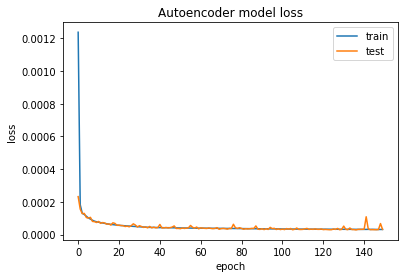

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 45s 174us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

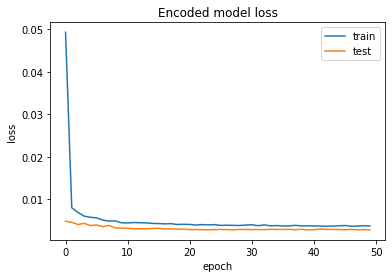

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994382219725431


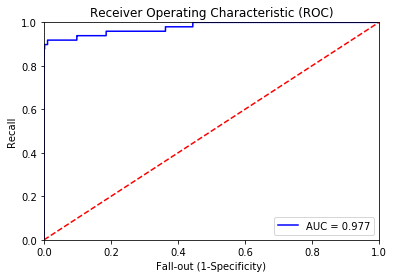

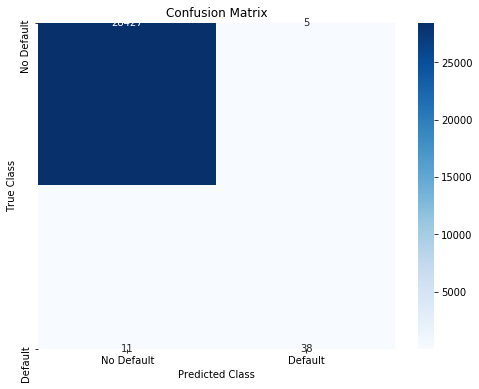

AUC(ROC): 0.8876671729468377
Precision: 0.8837209302325582
Recall: 0.7755102040816326
F1 score: 0.826086956521739
False positives: 5
True positives: 38
False negatives: 11
True negatives: 28427
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.0012 - val_loss: 3.2876e-04
Epoch 2/150
256326/256326 [==============================] - 19s 75us/step - loss: 2.1025e-04 - val_loss: 1.5063e-04
Epoch 3/150
256326/256326 [==============================] - 19s 74us/step - loss: 1.3334e-04 - val_loss: 1.2058e-04
Epoch 4/150
256326/256326 [==============================] - 19s 75us/step - loss: 1.2273e-04 - val_loss: 1.1222e-04
Epoch 5/150
256326/256326 [==============================] - 19s 75us/step - loss: 1.1557e-04 - val_loss: 1.0207e-04
Epoch 6/150
256326/256326 [==============================] - 19s 75us/step - loss: 1.0525e-04 - val_loss: 1.0988e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 19s 73us/step - loss: 3.8205e-05 - val_loss: 3.4459e-05
Epoch 69/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.8098e-05 - val_loss: 4.3895e-05
Epoch 70/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7840e-05 - val_loss: 3.6249e-05
Epoch 71/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.8083e-05 - val_loss: 7.0443e-05
Epoch 72/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7759e-05 - val_loss: 3.8131e-05
Epoch 73/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7468e-05 - val_loss: 3.6681e-05
Epoch 74/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7391e-05 - val_loss: 3.3191e-05
Epoch 75/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.7292e-05 - val_loss: 3.5598e-05
Epoch 76/150
256326/256326 [==============================] - 19s 73u

256326/256326 [==============================] - 19s 74us/step - loss: 2.9918e-05 - val_loss: 3.1345e-05
Epoch 138/150
256326/256326 [==============================] - 19s 74us/step - loss: 2.9556e-05 - val_loss: 2.7377e-05
Epoch 139/150
256326/256326 [==============================] - 19s 74us/step - loss: 2.9418e-05 - val_loss: 2.8685e-05
Epoch 140/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.0093e-05 - val_loss: 2.6391e-05
Epoch 141/150
256326/256326 [==============================] - 19s 74us/step - loss: 2.9453e-05 - val_loss: 2.7889e-05
Epoch 142/150
256326/256326 [==============================] - 19s 74us/step - loss: 2.9058e-05 - val_loss: 2.7259e-05
Epoch 143/150
256326/256326 [==============================] - 19s 74us/step - loss: 4.2478e-05 - val_loss: 4.0853e-05
Epoch 144/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.9747e-05 - val_loss: 3.9630e-05
Epoch 145/150
256326/256326 [==============================] -

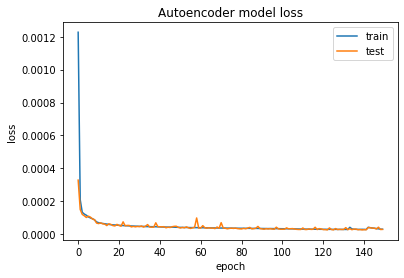

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 47s 182us/step - loss: 0.0292 - accuracy: 0.9932 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 2/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.0059 - val_accuracy: 0.9991
Epoch 3/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 4/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0053 - val_accuracy: 0.9992
Epoch 5/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0052 - val_accuracy: 0.9991
Epoch 6/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 7/50
256326/256326 [=================

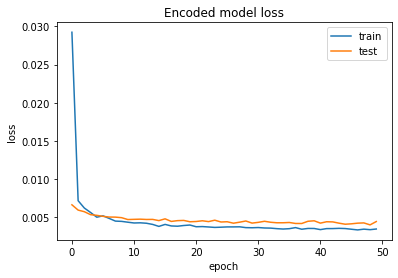

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9991573329588147


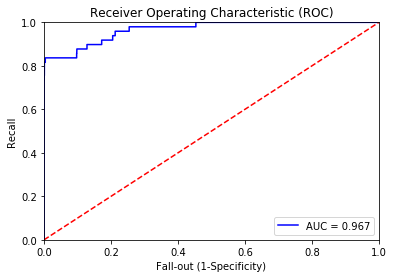

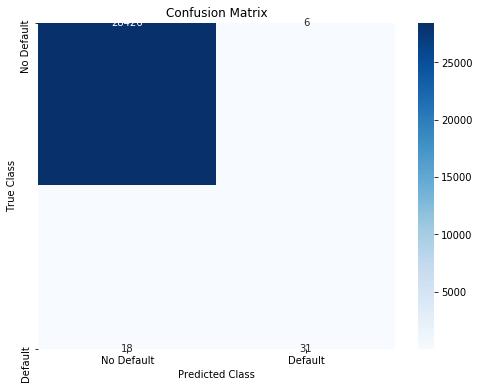

AUC(ROC): 0.8162210156994706
Precision: 0.8378378378378378
Recall: 0.6326530612244898
F1 score: 0.7209302325581396
False positives: 6
True positives: 31
False negatives: 18
True negatives: 28426
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.0016 - val_loss: 2.9961e-04
Epoch 2/150
256326/256326 [==============================] - 18s 71us/step - loss: 1.9608e-04 - val_loss: 1.4433e-04
Epoch 3/150
256326/256326 [==============================] - 18s 72us/step - loss: 1.3406e-04 - val_loss: 1.1954e-04
Epoch 4/150
256326/256326 [==============================] - 18s 72us/step - loss: 1.1800e-04 - val_loss: 1.1575e-04
Epoch 5/150
256326/256326 [==============================] - 18s 72us/step - loss: 1.0640e-04 - val_loss: 9.3273e-05
Epoch 6/150
256326/256326 [==============================] - 19s 72us/step - loss: 9.7313e-05 - val_loss: 9.2273e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 19s 75us/step - loss: 3.6630e-05 - val_loss: 4.7434e-05
Epoch 69/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.6871e-05 - val_loss: 3.9937e-05
Epoch 70/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.6722e-05 - val_loss: 3.7348e-05
Epoch 71/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.6363e-05 - val_loss: 3.2873e-05
Epoch 72/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.6268e-05 - val_loss: 3.3225e-05
Epoch 73/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.6234e-05 - val_loss: 4.3046e-05
Epoch 74/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.6076e-05 - val_loss: 3.3668e-05
Epoch 75/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.6056e-05 - val_loss: 3.4595e-05
Epoch 76/150
256326/256326 [==============================] - 19s 72u

256326/256326 [==============================] - 19s 73us/step - loss: 3.2115e-05 - val_loss: 3.2290e-05
Epoch 138/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.1955e-05 - val_loss: 4.1118e-05
Epoch 139/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.1999e-05 - val_loss: 2.8619e-05
Epoch 140/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.2124e-05 - val_loss: 2.9069e-05
Epoch 141/150
256326/256326 [==============================] - 19s 76us/step - loss: 3.1829e-05 - val_loss: 3.8710e-05
Epoch 142/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.1882e-05 - val_loss: 2.9310e-05
Epoch 143/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.2063e-05 - val_loss: 3.4449e-05
Epoch 144/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.1506e-05 - val_loss: 4.0160e-05
Epoch 145/150
256326/256326 [==============================] -

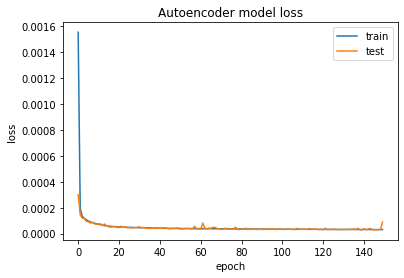

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 48s 188us/step - loss: 0.0364 - accuracy: 0.9903 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 47s 183us/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 47s 182us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 47s 182us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 6/50
256326/256326 [==============================] - 49s 190us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

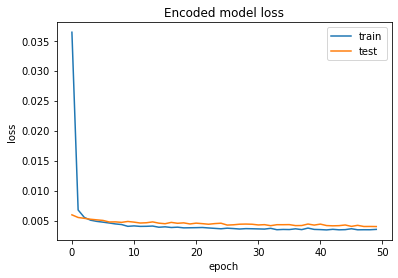

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999403110845827


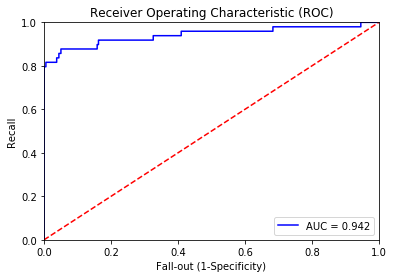

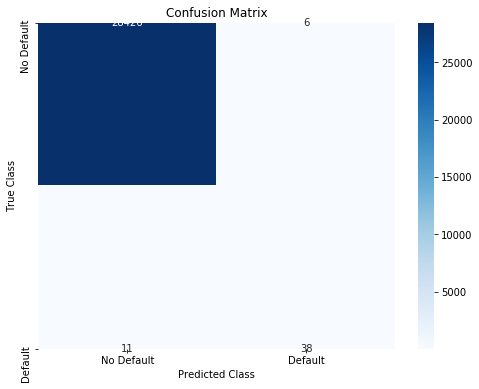

AUC(ROC): 0.887649587128042
Precision: 0.8636363636363636
Recall: 0.7755102040816326
F1 score: 0.8172043010752688
False positives: 6
True positives: 38
False negatives: 11
True negatives: 28426
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 20s 78us/step - loss: 0.0017 - val_loss: 2.8311e-04
Epoch 2/150
256326/256326 [==============================] - 19s 75us/step - loss: 1.9797e-04 - val_loss: 1.5754e-04
Epoch 3/150
256326/256326 [==============================] - 19s 76us/step - loss: 1.3831e-04 - val_loss: 1.2233e-04
Epoch 4/150
256326/256326 [==============================] - 20s 78us/step - loss: 1.2176e-04 - val_loss: 1.2229e-04
Epoch 5/150
256326/256326 [==============================] - 20s 77us/step - loss: 1.1140e-04 - val_loss: 1.0158e-04
Epoch 6/150
256326/256326 [==============================] - 20s 76us/step - loss: 9.5171e-05 - val_loss: 8.7959e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 19s 75us/step - loss: 3.7899e-05 - val_loss: 3.5034e-05
Epoch 69/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.7750e-05 - val_loss: 3.4431e-05
Epoch 70/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.7657e-05 - val_loss: 3.4278e-05
Epoch 71/150
256326/256326 [==============================] - 19s 75us/step - loss: 3.7501e-05 - val_loss: 3.9215e-05
Epoch 72/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.7246e-05 - val_loss: 3.7853e-05
Epoch 73/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.7101e-05 - val_loss: 4.9413e-05
Epoch 74/150
256326/256326 [==============================] - 20s 77us/step - loss: 3.7178e-05 - val_loss: 4.1670e-05
Epoch 75/150
256326/256326 [==============================] - 19s 75us/step - loss: 3.6879e-05 - val_loss: 3.5812e-05
Epoch 76/150
256326/256326 [==============================] - 19s 75u

256326/256326 [==============================] - 18s 70us/step - loss: 3.1130e-05 - val_loss: 2.9715e-05
Epoch 138/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.1302e-05 - val_loss: 3.2458e-05
Epoch 139/150
256326/256326 [==============================] - 18s 69us/step - loss: 3.1227e-05 - val_loss: 3.3008e-05
Epoch 140/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.1059e-05 - val_loss: 3.0476e-05
Epoch 141/150
256326/256326 [==============================] - 18s 69us/step - loss: 3.1161e-05 - val_loss: 3.6004e-05
Epoch 142/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.0951e-05 - val_loss: 3.4948e-05
Epoch 143/150
256326/256326 [==============================] - 18s 69us/step - loss: 3.1014e-05 - val_loss: 3.4249e-05
Epoch 144/150
256326/256326 [==============================] - 18s 69us/step - loss: 3.1009e-05 - val_loss: 2.8672e-05
Epoch 145/150
256326/256326 [==============================] -

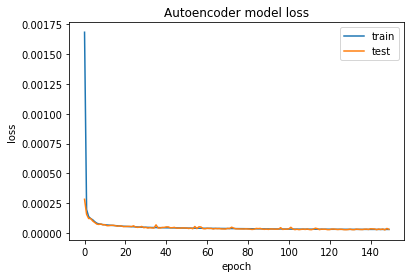

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0327 - accuracy: 0.9941 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 2/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.0074 - val_accuracy: 0.9991
Epoch 3/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0052 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0056 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 44s 170us/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

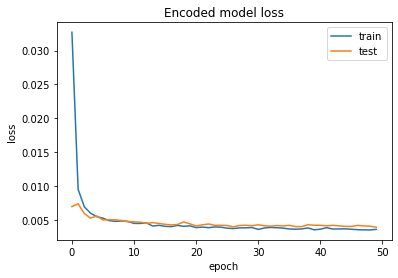

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994382219725431


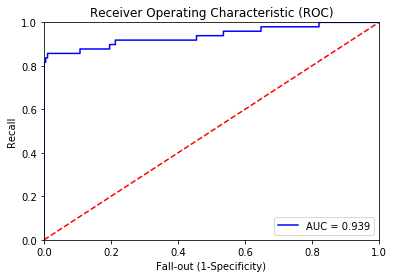

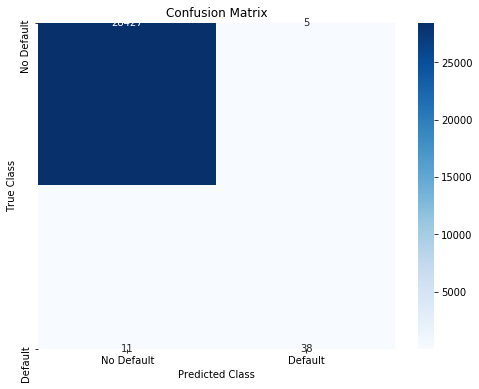

AUC(ROC): 0.8876671729468377
Precision: 0.8837209302325582
Recall: 0.7755102040816326
F1 score: 0.826086956521739
False positives: 5
True positives: 38
False negatives: 11
True negatives: 28427
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.0017 - val_loss: 2.7345e-04
Epoch 2/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.9360e-04 - val_loss: 1.4695e-04
Epoch 3/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.2989e-04 - val_loss: 1.2526e-04
Epoch 4/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.1656e-04 - val_loss: 1.1857e-04
Epoch 5/150
256326/256326 [==============================] - 18s 72us/step - loss: 1.0430e-04 - val_loss: 1.0444e-04
Epoch 6/150
256326/256326 [==============================] - 18s 72us/step - loss: 9.7659e-05 - val_loss: 9.6549e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 18s 72us/step - loss: 3.6819e-05 - val_loss: 3.5714e-05
Epoch 69/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.6914e-05 - val_loss: 3.5248e-05
Epoch 70/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.6427e-05 - val_loss: 3.9495e-05
Epoch 71/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.6456e-05 - val_loss: 3.5588e-05
Epoch 72/150
256326/256326 [==============================] - 19s 72us/step - loss: 3.6412e-05 - val_loss: 6.4566e-05
Epoch 73/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.5991e-05 - val_loss: 3.5372e-05
Epoch 74/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.5743e-05 - val_loss: 3.7859e-05
Epoch 75/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.5776e-05 - val_loss: 3.9685e-05
Epoch 76/150
256326/256326 [==============================] - 18s 72u

256326/256326 [==============================] - 18s 72us/step - loss: 3.0804e-05 - val_loss: 3.7979e-05
Epoch 138/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.0837e-05 - val_loss: 2.8156e-05
Epoch 139/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.0896e-05 - val_loss: 3.3721e-05
Epoch 140/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.0908e-05 - val_loss: 3.2112e-05
Epoch 141/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.0549e-05 - val_loss: 3.4114e-05
Epoch 142/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.0698e-05 - val_loss: 3.7129e-05
Epoch 143/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.0588e-05 - val_loss: 3.4663e-05
Epoch 144/150
256326/256326 [==============================] - 18s 72us/step - loss: 3.0588e-05 - val_loss: 3.0751e-05
Epoch 145/150
256326/256326 [==============================] -

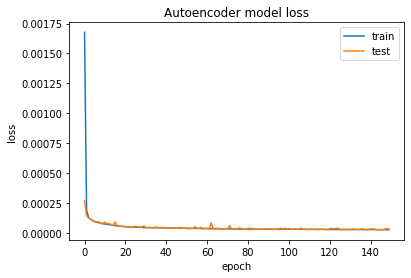

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0271 - accuracy: 0.9933 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 2/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 3/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 5/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 6/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

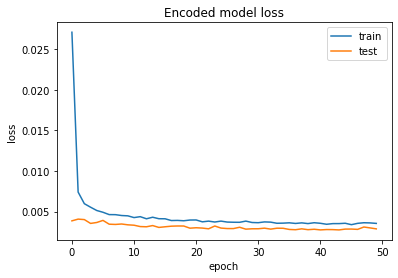

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994733330992591


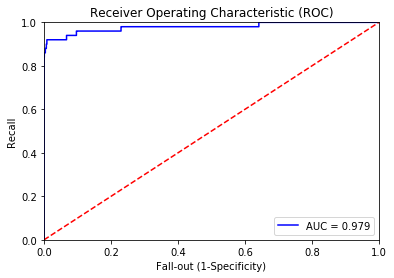

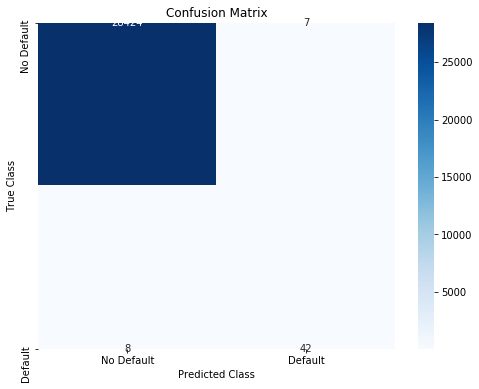

AUC(ROC): 0.9198768949386232
Precision: 0.8571428571428571
Recall: 0.84
F1 score: 0.8484848484848485
False positives: 7
True positives: 42
False negatives: 8
True negatives: 28424
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.0012 - val_loss: 2.3071e-04
Epoch 2/150
256326/256326 [==============================] - 19s 75us/step - loss: 1.7255e-04 - val_loss: 1.4790e-04
Epoch 3/150
256326/256326 [==============================] - 19s 75us/step - loss: 1.2946e-04 - val_loss: 1.3192e-04
Epoch 4/150
256326/256326 [==============================] - 19s 75us/step - loss: 1.1854e-04 - val_loss: 1.3945e-04
Epoch 5/150
256326/256326 [==============================] - 19s 75us/step - loss: 9.7899e-05 - val_loss: 1.1989e-04
Epoch 6/150
256326/256326 [==============================] - 19s 75us/step - loss: 9.0479e-05 - val_loss: 9.5304e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 19s 74us/step - loss: 3.4402e-05 - val_loss: 3.7724e-05
Epoch 69/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.4319e-05 - val_loss: 3.5738e-05
Epoch 70/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.4191e-05 - val_loss: 3.6075e-05
Epoch 71/150
256326/256326 [==============================] - 19s 75us/step - loss: 3.4250e-05 - val_loss: 4.3853e-05
Epoch 72/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.3843e-05 - val_loss: 3.9751e-05
Epoch 73/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.3728e-05 - val_loss: 3.3004e-05
Epoch 74/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.3838e-05 - val_loss: 3.6174e-05
Epoch 75/150
256326/256326 [==============================] - 19s 74us/step - loss: 3.3606e-05 - val_loss: 3.6733e-05
Epoch 76/150
256326/256326 [==============================] - 19s 74u

256326/256326 [==============================] - 19s 73us/step - loss: 2.9770e-05 - val_loss: 3.0440e-05
Epoch 138/150
256326/256326 [==============================] - 19s 74us/step - loss: 2.9722e-05 - val_loss: 3.0763e-05
Epoch 139/150
256326/256326 [==============================] - 19s 72us/step - loss: 2.9464e-05 - val_loss: 2.9659e-05
Epoch 140/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.9386e-05 - val_loss: 5.5485e-05
Epoch 141/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.9435e-05 - val_loss: 5.6901e-05
Epoch 142/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.9757e-05 - val_loss: 3.2866e-05
Epoch 143/150
256326/256326 [==============================] - 19s 74us/step - loss: 2.9674e-05 - val_loss: 3.5358e-05
Epoch 144/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.9679e-05 - val_loss: 3.2750e-05
Epoch 145/150
256326/256326 [==============================] -

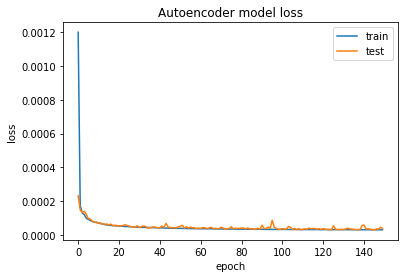

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0076 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 4/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 5/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 6/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/50
256326/256326 [=================

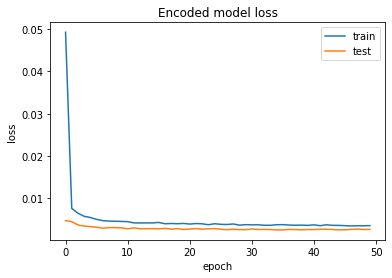

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995786664794073


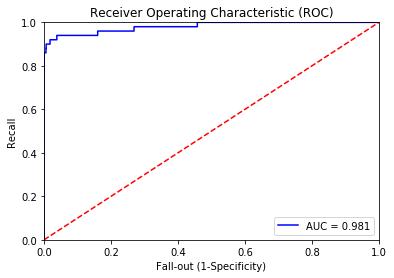

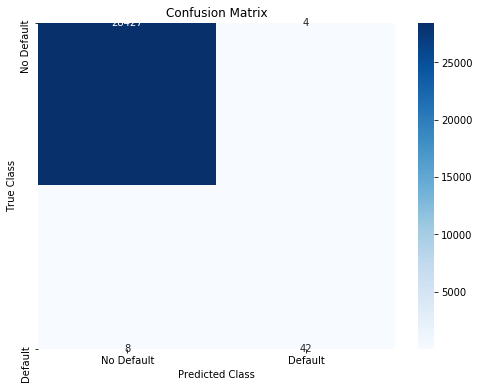

AUC(ROC): 0.9199296542506419
Precision: 0.9130434782608695
Recall: 0.84
F1 score: 0.8749999999999999
False positives: 4
True positives: 42
False negatives: 8
True negatives: 28427
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.0013 - val_loss: 2.2833e-04
Epoch 2/150
256327/256327 [==============================] - 19s 73us/step - loss: 1.8370e-04 - val_loss: 1.4638e-04
Epoch 3/150
256327/256327 [==============================] - 19s 73us/step - loss: 1.3359e-04 - val_loss: 1.5744e-04
Epoch 4/150
256327/256327 [==============================] - 19s 72us/step - loss: 1.2183e-04 - val_loss: 1.1825e-04
Epoch 5/150
256327/256327 [==============================] - 19s 72us/step - loss: 1.1069e-04 - val_loss: 1.0620e-04
Epoch 6/150
256327/256327 [==============================] - 18s 72us/step - loss: 1.0067e-04 - val_loss: 9.1295e-05
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 18s 72us/step - loss: 4.0666e-05 - val_loss: 4.2733e-05
Epoch 69/150
256327/256327 [==============================] - 18s 72us/step - loss: 4.0456e-05 - val_loss: 4.1392e-05
Epoch 70/150
256327/256327 [==============================] - 18s 72us/step - loss: 4.0616e-05 - val_loss: 3.9250e-05
Epoch 71/150
256327/256327 [==============================] - 19s 72us/step - loss: 4.0190e-05 - val_loss: 4.0404e-05
Epoch 72/150
256327/256327 [==============================] - 18s 72us/step - loss: 4.0446e-05 - val_loss: 3.6795e-05
Epoch 73/150
256327/256327 [==============================] - 19s 73us/step - loss: 4.0248e-05 - val_loss: 4.1541e-05
Epoch 74/150
256327/256327 [==============================] - 19s 72us/step - loss: 4.0099e-05 - val_loss: 3.7919e-05
Epoch 75/150
256327/256327 [==============================] - 18s 72us/step - loss: 3.9678e-05 - val_loss: 3.7400e-05
Epoch 76/150
256327/256327 [==============================] - 18s 72u

256327/256327 [==============================] - 18s 72us/step - loss: 3.4656e-05 - val_loss: 4.0892e-05
Epoch 138/150
256327/256327 [==============================] - 18s 72us/step - loss: 3.5437e-05 - val_loss: 3.1912e-05
Epoch 139/150
256327/256327 [==============================] - 18s 72us/step - loss: 3.4541e-05 - val_loss: 3.3380e-05
Epoch 140/150
256327/256327 [==============================] - 18s 72us/step - loss: 3.4275e-05 - val_loss: 3.6186e-05
Epoch 141/150
256327/256327 [==============================] - 18s 72us/step - loss: 3.4096e-05 - val_loss: 3.3701e-05
Epoch 142/150
256327/256327 [==============================] - 18s 72us/step - loss: 3.4521e-05 - val_loss: 3.1845e-05
Epoch 143/150
256327/256327 [==============================] - 18s 70us/step - loss: 3.4310e-05 - val_loss: 3.4995e-05
Epoch 144/150
256327/256327 [==============================] - 18s 70us/step - loss: 3.4757e-05 - val_loss: 3.1882e-05
Epoch 145/150
256327/256327 [==============================] -

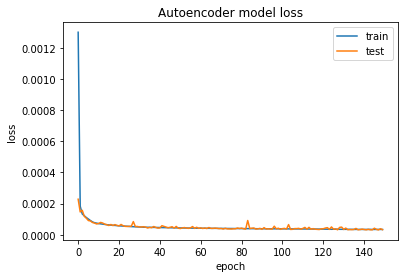

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 48s 186us/step - loss: 0.0307 - accuracy: 0.9914 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 2/50
256327/256327 [==============================] - 47s 182us/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 3/50
256327/256327 [==============================] - 47s 182us/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 4/50
256327/256327 [==============================] - 47s 182us/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 5/50
256327/256327 [==============================] - 46s 179us/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 6/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 7/50
256327/256327 [=================

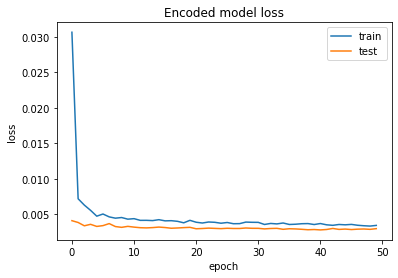

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995084269662922


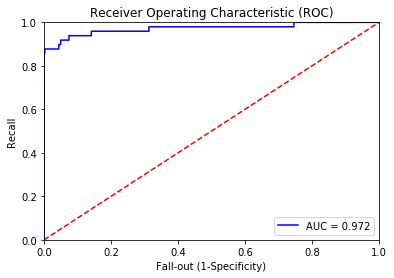

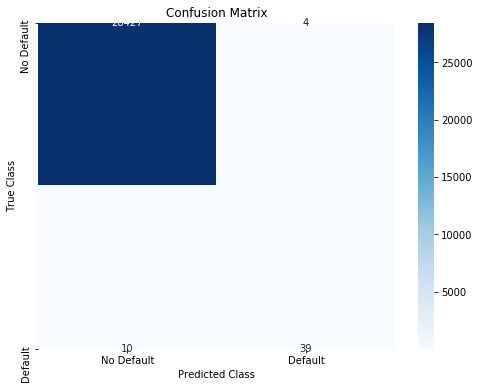

AUC(ROC): 0.8978888379241112
Precision: 0.9069767441860465
Recall: 0.7959183673469388
F1 score: 0.8478260869565216
False positives: 4
True positives: 39
False negatives: 10
True negatives: 28427
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 18s 71us/step - loss: 0.0013 - val_loss: 2.6647e-04
Epoch 2/150
256327/256327 [==============================] - 18s 70us/step - loss: 1.9495e-04 - val_loss: 1.7117e-04
Epoch 3/150
256327/256327 [==============================] - 18s 69us/step - loss: 1.2991e-04 - val_loss: 1.2863e-04
Epoch 4/150
256327/256327 [==============================] - 18s 70us/step - loss: 1.1774e-04 - val_loss: 1.2330e-04
Epoch 5/150
256327/256327 [==============================] - 18s 69us/step - loss: 1.0725e-04 - val_loss: 1.1368e-04
Epoch 6/150
256327/256327 [==============================] - 18s 69us/step - loss: 1.0165e-04 - val_loss: 1.0261e-04
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 17s 67us/step - loss: 3.7007e-05 - val_loss: 4.0429e-05
Epoch 69/150
256327/256327 [==============================] - 17s 68us/step - loss: 3.7179e-05 - val_loss: 4.0557e-05
Epoch 70/150
256327/256327 [==============================] - 17s 67us/step - loss: 3.6962e-05 - val_loss: 3.7117e-05
Epoch 71/150
256327/256327 [==============================] - 17s 67us/step - loss: 3.6754e-05 - val_loss: 3.8451e-05
Epoch 72/150
256327/256327 [==============================] - 17s 67us/step - loss: 3.6809e-05 - val_loss: 5.4188e-05
Epoch 73/150
256327/256327 [==============================] - 17s 68us/step - loss: 3.6448e-05 - val_loss: 6.7313e-05
Epoch 74/150
256327/256327 [==============================] - 17s 68us/step - loss: 3.6656e-05 - val_loss: 4.4550e-05
Epoch 75/150
256327/256327 [==============================] - 17s 68us/step - loss: 3.6414e-05 - val_loss: 3.6162e-05
Epoch 76/150
256327/256327 [==============================] - 17s 68u

256327/256327 [==============================] - 18s 69us/step - loss: 3.2778e-05 - val_loss: 3.4204e-05
Epoch 138/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.2818e-05 - val_loss: 3.3413e-05
Epoch 139/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.2739e-05 - val_loss: 3.4144e-05
Epoch 140/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.2727e-05 - val_loss: 3.4680e-05
Epoch 141/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.2913e-05 - val_loss: 3.4555e-05
Epoch 142/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.2847e-05 - val_loss: 3.5962e-05
Epoch 143/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.2638e-05 - val_loss: 3.9416e-05
Epoch 144/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.2461e-05 - val_loss: 3.9993e-05
Epoch 145/150
256327/256327 [==============================] -

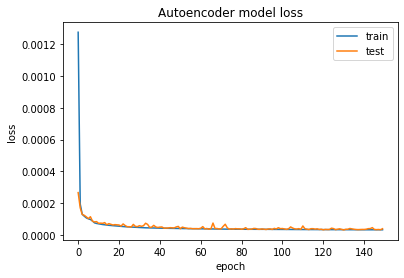

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 46s 181us/step - loss: 0.0201 - accuracy: 0.9957 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 2/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 3/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 4/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 6/50
256327/256327 [==============================] - 46s 179us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 7/50
256327/256327 [=================

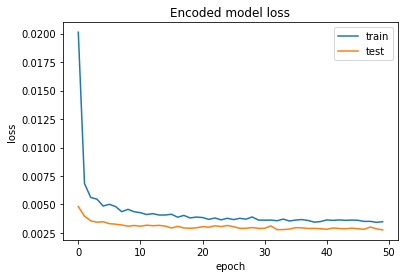

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999438202247191


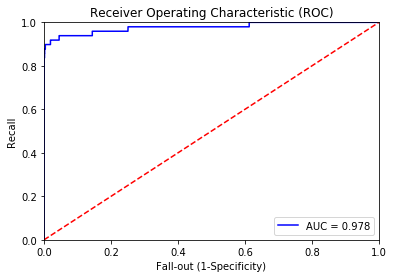

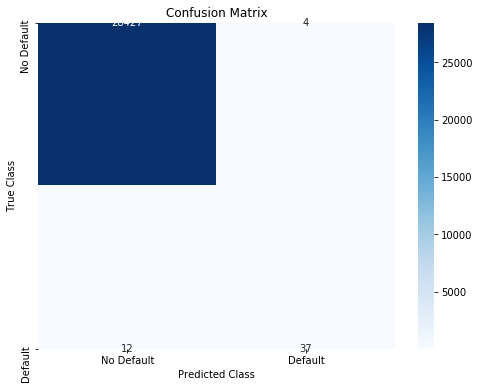

AUC(ROC): 0.8774806746588052
Precision: 0.9024390243902439
Recall: 0.7551020408163265
F1 score: 0.8222222222222222
False positives: 4
True positives: 37
False negatives: 12
True negatives: 28427
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 17s 68us/step - loss: 0.0011 - val_loss: 2.9135e-04
Epoch 2/150
256327/256327 [==============================] - 17s 67us/step - loss: 2.0672e-04 - val_loss: 1.5080e-04
Epoch 3/150
256327/256327 [==============================] - 17s 68us/step - loss: 1.3543e-04 - val_loss: 1.3792e-04
Epoch 4/150
256327/256327 [==============================] - 17s 67us/step - loss: 1.2255e-04 - val_loss: 1.1750e-04
Epoch 5/150
256327/256327 [==============================] - 17s 67us/step - loss: 1.1529e-04 - val_loss: 1.1035e-04
Epoch 6/150
256327/256327 [==============================] - 17s 67us/step - loss: 1.0774e-04 - val_loss: 1.0023e-04
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 18s 69us/step - loss: 3.6986e-05 - val_loss: 4.1160e-05
Epoch 69/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.7096e-05 - val_loss: 4.5951e-05
Epoch 70/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.6944e-05 - val_loss: 3.6210e-05
Epoch 71/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.6773e-05 - val_loss: 3.6171e-05
Epoch 72/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.6617e-05 - val_loss: 3.9869e-05
Epoch 73/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.6633e-05 - val_loss: 3.8364e-05
Epoch 74/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.6577e-05 - val_loss: 3.2585e-05
Epoch 75/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.6327e-05 - val_loss: 3.5427e-05
Epoch 76/150
256327/256327 [==============================] - 18s 69u

256327/256327 [==============================] - 18s 69us/step - loss: 3.1555e-05 - val_loss: 3.7071e-05
Epoch 138/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.1717e-05 - val_loss: 2.8794e-05
Epoch 139/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.1681e-05 - val_loss: 3.9613e-05
Epoch 140/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.1660e-05 - val_loss: 3.3907e-05
Epoch 141/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.1301e-05 - val_loss: 3.0304e-05
Epoch 142/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.1387e-05 - val_loss: 2.9660e-05
Epoch 143/150
256327/256327 [==============================] - 18s 69us/step - loss: 3.1469e-05 - val_loss: 2.8873e-05
Epoch 144/150
256327/256327 [==============================] - 18s 70us/step - loss: 3.1341e-05 - val_loss: 3.0714e-05
Epoch 145/150
256327/256327 [==============================] -

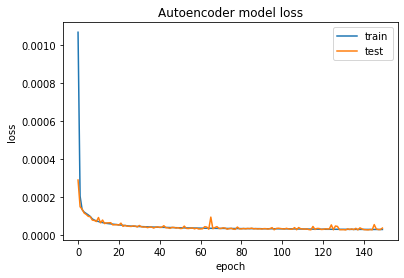

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 46s 181us/step - loss: 0.0158 - accuracy: 0.9968 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 2/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 3/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 5/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 6/50
256327/256327 [==============================] - 45s 177us/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/50
256327/256327 [=================

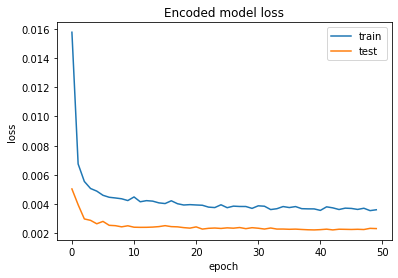

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994030898876405


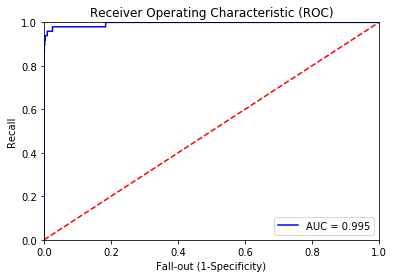

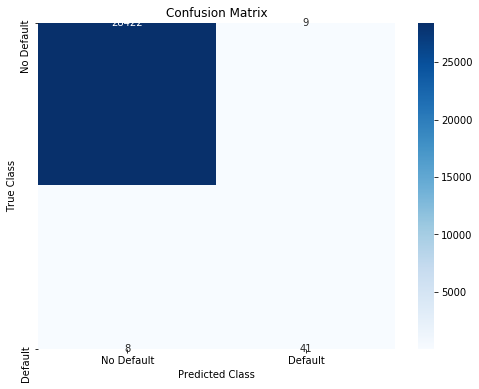

AUC(ROC): 0.9182090690027198
Precision: 0.82
Recall: 0.8367346938775511
F1 score: 0.8282828282828283
False positives: 9
True positives: 41
False negatives: 8
True negatives: 28422


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 28425.9
 Average fp = 5.6
 Average fn = 10.9
 Average tp = 38.3
 Average Precision = 0.8724373576309795
 Average Recall = 0.7784552845528455
 Average F1 score = 0.8227712137486574


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284259
 Total fp: 56
 Total fn: 109
 Total tp: 383
 Total Precision = 0.8724373576309795
 Total Recall = 0.7784552845528455
 Total F1_score = 0.8227712137486574


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 50648.98912167549 seconds ---
50648.990119218826


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

14.06916392200523
